[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


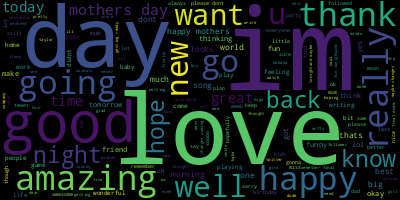

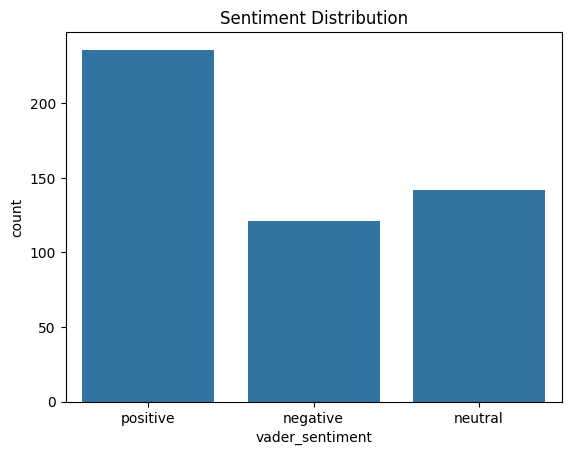

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
# Replace 'sentiment_analysis.csv' with the actual filename of your dataset
df = pd.read_csv("sentiment_analysis.csv")
df.head()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Assuming your text column is named 'text' or 'review' or ... please check your dataframe column name.
# Replace 'text' with the actual name of your text column
df['cleaned_text'] = df['text'].apply(preprocess_text)  # Changed from 'text_column' to 'text'
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['vader_score'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['textblob_score'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize
df['vader_sentiment'] = df['vader_score'].apply(lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral')
sns.countplot(x='vader_sentiment', data=df)
plt.title("Sentiment Distribution")

# Word Cloud for each sentiment
positive_text = " ".join(df[df['vader_sentiment'] == 'positive']['cleaned_text'])
WordCloud().generate(positive_text).to_image()